In [1]:
from os import listdir
from os.path import isfile, join

import seaborn as sns
import matplotlib.pyplot as plt
from utils.rodents_routine import params_to_J_scalar, params_to_P_scalar, params_to_w_scalar

import pandas as pd

In [2]:
plt.rcParams.update({'font.size': 16})
sns.set(font_scale=1.5)

In [3]:
path = r"/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/results/backprop1000NewLossFunctionHeterFF/method_validation"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [4]:
data = []
for file in files:
    with open(f"{path}/{file}", 'r') as f:
        count = 0
        for line in f:
            if line[0] == '[':
                if count == 0:
                    J_array = eval(line.strip())
                    count += 1
                elif count == 1:
                    P_array = eval(line.strip())
                    count +=1
                else:
                    w_array = eval(line.strip())
                    count = 0
            if line[:5] == "loss:":
                loss = float(line.strip().split(' ')[-1])
            if line[:9] == "heter_ff:":
                heter_ff = eval(line.strip().split(' ')[-1])[0]
        datum = {"J EE": params_to_J_scalar(J_array[0]), 
                 "J EI": params_to_J_scalar(J_array[1]), 
                 "J IE": params_to_J_scalar(J_array[2]),
                 "J II": params_to_J_scalar(J_array[3]),
                 "P EE": params_to_P_scalar(P_array[0]),
                 "P EI": params_to_P_scalar(P_array[1]),
                 "P IE": params_to_P_scalar(P_array[2]),
                 "P II": params_to_P_scalar(P_array[3]),
                 "w EE": params_to_w_scalar(w_array[0]),
                 "w EI": params_to_w_scalar(w_array[1]),
                 "w IE": params_to_w_scalar(w_array[2]),
                 "w II": params_to_w_scalar(w_array[3]),
                 "heter_ff": heter_ff,
                 "loss": loss}
        
        data.append(datum)

In [5]:
df = pd.DataFrame(data)
for datum in data[:5]:
    print(datum)
df.head()

{'J EE': 0.9128798597831439, 'J EI': 36.59427509877788, 'J IE': 39.375408552488466, 'J II': 9.824100311626747, 'P EE': 0.024124165879752715, 'P EI': 0.016474955382205145, 'P IE': 0.023394845597034013, 'P II': 0.03205455717309457, 'w EE': 21.27225120164448, 'w EI': 8.44343355925951, 'w IE': 22.69077500039404, 'w II': 97.25724406632114, 'heter_ff': 0.301494, 'loss': 0.022220682352781296}
{'J EE': 0.553940584724257, 'J EI': 3.1573240401244695, 'J IE': 1.146121801594051, 'J II': 3.507081557409925, 'P EE': 0.5386820012293734, 'P EI': 0.4276007591836803, 'P IE': 0.5808704223232828, 'P II': 0.5118379144473824, 'w EE': 20.306667928713907, 'w EI': 170.8638502671558, 'w IE': 133.600902234573, 'w II': 58.37160097474241, 'heter_ff': 0.640846, 'loss': 0.018346499651670456}
{'J EE': 0.8455914321041071, 'J EI': 12.284180967109021, 'J IE': 39.3884866204177, 'J II': 37.914126379099834, 'P EE': 0.5624844508595707, 'P EI': 0.0437664791270759, 'P IE': 0.022591288221940172, 'P II': 0.01808414974788842, 'w 

,J EE,J EI,J IE,J II,P EE,P EI,P IE,P II,w EE,w EI,w IE,w II,heter_ff,loss
0,0.912880,36.594275,39.375409,9.824100,0.024124,0.016475,0.023395,0.032055,21.272251,8.443434,22.690775,97.257244,0.301494,0.022221
1,0.553941,3.157324,1.146122,3.507082,0.538682,0.427601,0.580870,0.511838,20.306668,170.863850,133.600902,58.371601,0.640846,0.018346
2,0.845591,12.284181,39.388487,37.914126,0.562484,0.043766,0.022591,0.018084,57.861674,83.765262,46.753939,82.215332,0.085858,0.014131
3,5.436776,6.986516,27.918945,32.915801,0.001524,0.018492,0.124129,0.216617,173.198440,70.653375,103.948902,99.089194,0.318014,0.013239
4,0.553941,3.157324,1.146122,3.507082,0.538682,0.427601,0.580870,0.511838,20.306668,170.863850,133.600902,58.371601,0.640846,0.018346


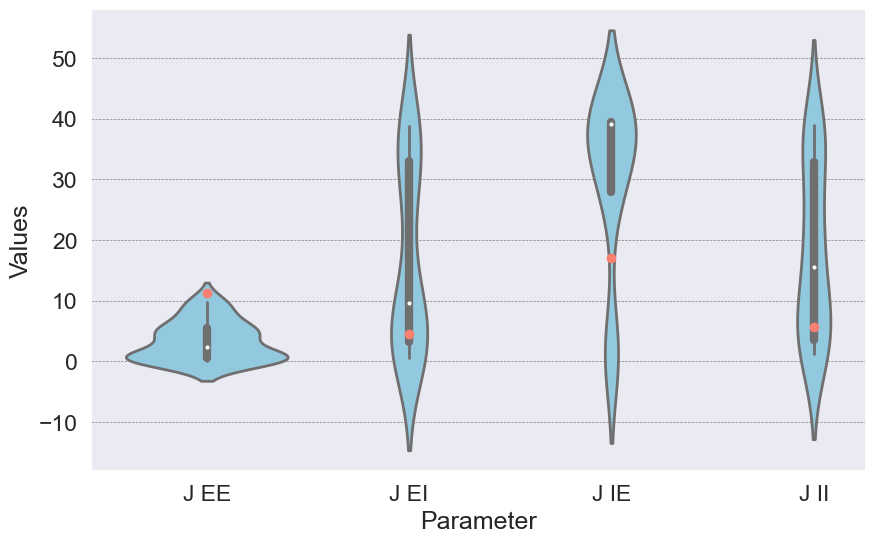

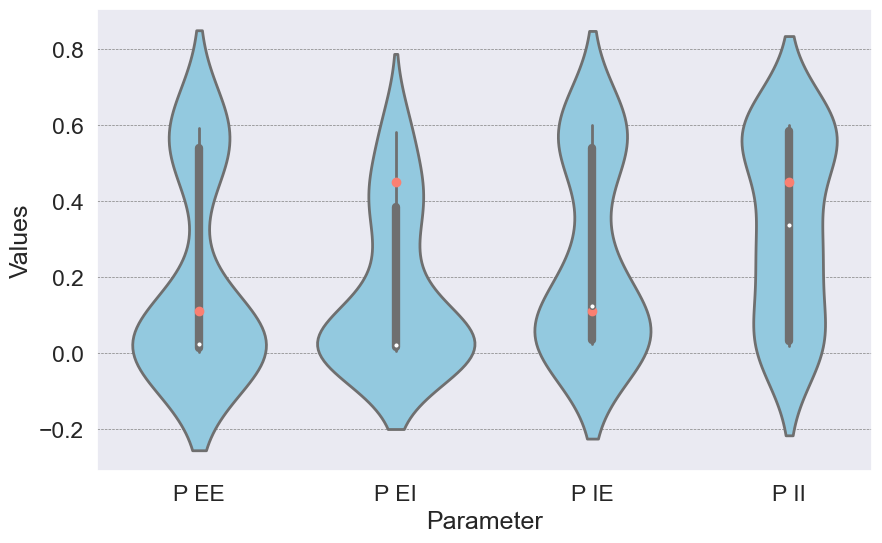

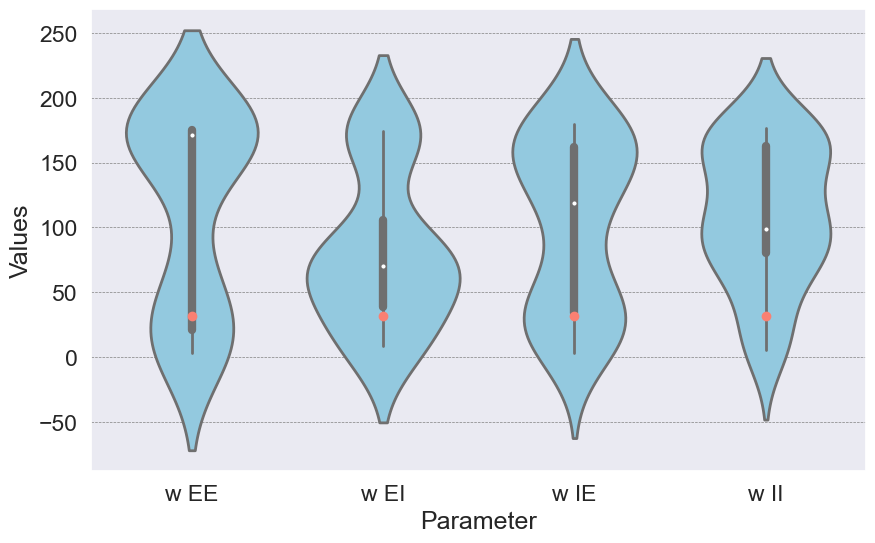

In [6]:
width = 0.8
linewidth=2

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["J EE", "J EI", "J IE", "J II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [11.31, 4.52, 16.97, 5.66]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["P EE", "P EI", "P IE", "P II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.11, 0.45, 0.11, 0.45]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["w EE", "w EI", "w IE", "w II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [32, 32, 32, 32]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()

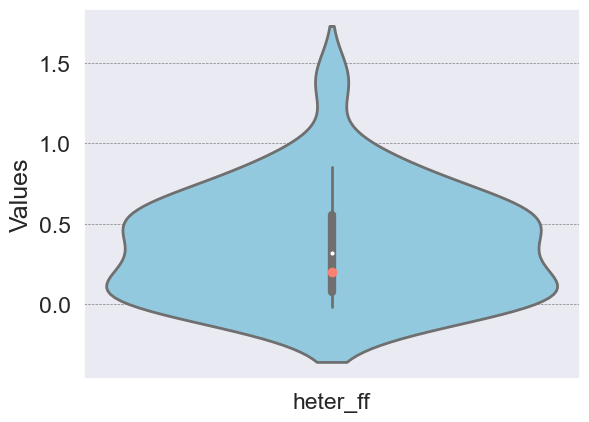

In [7]:
ax = sns.violinplot(data=df[["heter_ff"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
ground_truths = [0.2]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

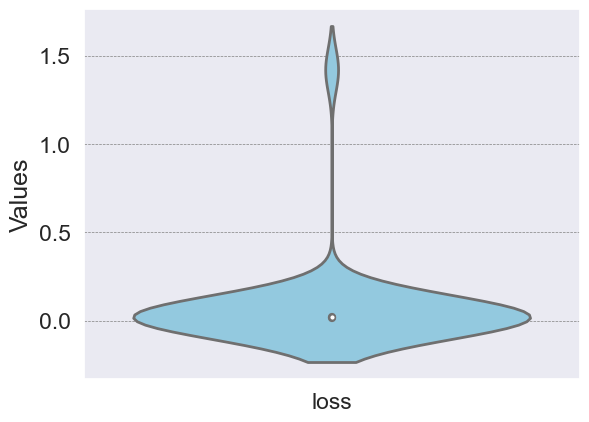

In [8]:
ax = sns.violinplot(data=df[["loss"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

In [13]:
# remove the data with only low loss

data = []
for file in files:
    with open(f"{path}/{file}", 'r') as f:
        count = 0
        for line in f:
            if line[0] == '[':
                if count == 0:
                    J_array = eval(line.strip())
                    count += 1
                elif count == 1:
                    P_array = eval(line.strip())
                    count +=1
                else:
                    w_array = eval(line.strip())
                    count = 0
            if line[:5] == "loss:":
                loss = float(line.strip().split(' ')[-1])
            if line[:9] == "heter_ff:":
                    heter_ff = eval(line.strip().split(' ')[-1])[0]
        datum = {"J EE": params_to_J_scalar(J_array[0]), 
                 "J EI": params_to_J_scalar(J_array[1]), 
                 "J IE": params_to_J_scalar(J_array[2]),
                 "J II": params_to_J_scalar(J_array[3]),
                 "P EE": params_to_P_scalar(P_array[0]),
                 "P EI": params_to_P_scalar(P_array[1]),
                 "P IE": params_to_P_scalar(P_array[2]),
                 "P II": params_to_P_scalar(P_array[3]),
                 "w EE": params_to_w_scalar(w_array[0]),
                 "w EI": params_to_w_scalar(w_array[1]),
                 "w IE": params_to_w_scalar(w_array[2]),
                 "w II": params_to_w_scalar(w_array[3]),
                 "heter_ff": heter_ff,
                 "loss": loss}
        if loss < 0.04:
            data.append(datum)

In [14]:
df = pd.DataFrame(data)
for datum in data[:5]:
    print(datum)
df.head()

{'J EE': 0.9128798597831439, 'J EI': 36.59427509877788, 'J IE': 39.375408552488466, 'J II': 9.824100311626747, 'P EE': 0.024124165879752715, 'P EI': 0.016474955382205145, 'P IE': 0.023394845597034013, 'P II': 0.03205455717309457, 'w EE': 21.27225120164448, 'w EI': 8.44343355925951, 'w IE': 22.69077500039404, 'w II': 97.25724406632114, 'heter_ff': 0.301494, 'loss': 0.022220682352781296}
{'J EE': 0.553940584724257, 'J EI': 3.1573240401244695, 'J IE': 1.146121801594051, 'J II': 3.507081557409925, 'P EE': 0.5386820012293734, 'P EI': 0.4276007591836803, 'P IE': 0.5808704223232828, 'P II': 0.5118379144473824, 'w EE': 20.306667928713907, 'w EI': 170.8638502671558, 'w IE': 133.600902234573, 'w II': 58.37160097474241, 'heter_ff': 0.640846, 'loss': 0.018346499651670456}
{'J EE': 0.8455914321041071, 'J EI': 12.284180967109021, 'J IE': 39.3884866204177, 'J II': 37.914126379099834, 'P EE': 0.5624844508595707, 'P EI': 0.0437664791270759, 'P IE': 0.022591288221940172, 'P II': 0.01808414974788842, 'w 

,J EE,J EI,J IE,J II,P EE,P EI,P IE,P II,w EE,w EI,w IE,w II,heter_ff,loss
0,0.912880,36.594275,39.375409,9.824100,0.024124,0.016475,0.023395,0.032055,21.272251,8.443434,22.690775,97.257244,0.301494,0.022221
1,0.553941,3.157324,1.146122,3.507082,0.538682,0.427601,0.580870,0.511838,20.306668,170.863850,133.600902,58.371601,0.640846,0.018346
2,0.845591,12.284181,39.388487,37.914126,0.562484,0.043766,0.022591,0.018084,57.861674,83.765262,46.753939,82.215332,0.085858,0.014131
3,5.436776,6.986516,27.918945,32.915801,0.001524,0.018492,0.124129,0.216617,173.198440,70.653375,103.948902,99.089194,0.318014,0.013239
4,0.553941,3.157324,1.146122,3.507082,0.538682,0.427601,0.580870,0.511838,20.306668,170.863850,133.600902,58.371601,0.640846,0.018346


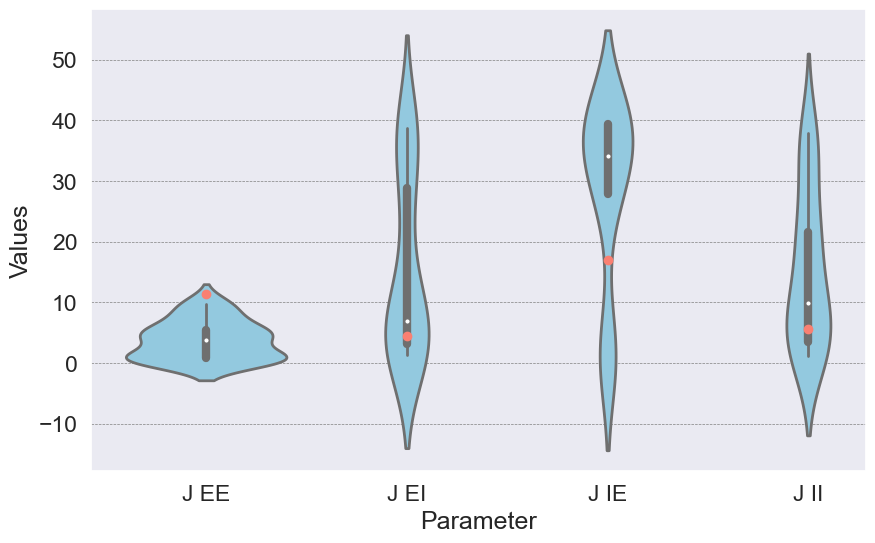

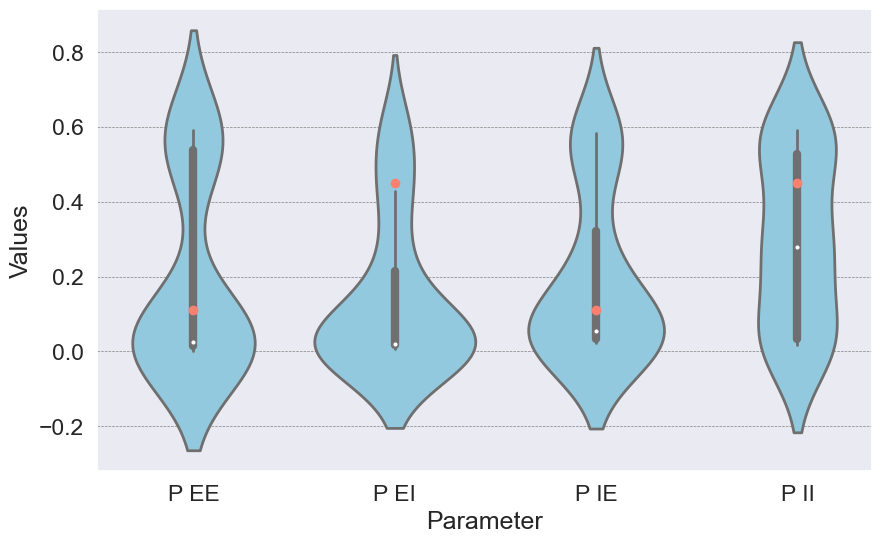

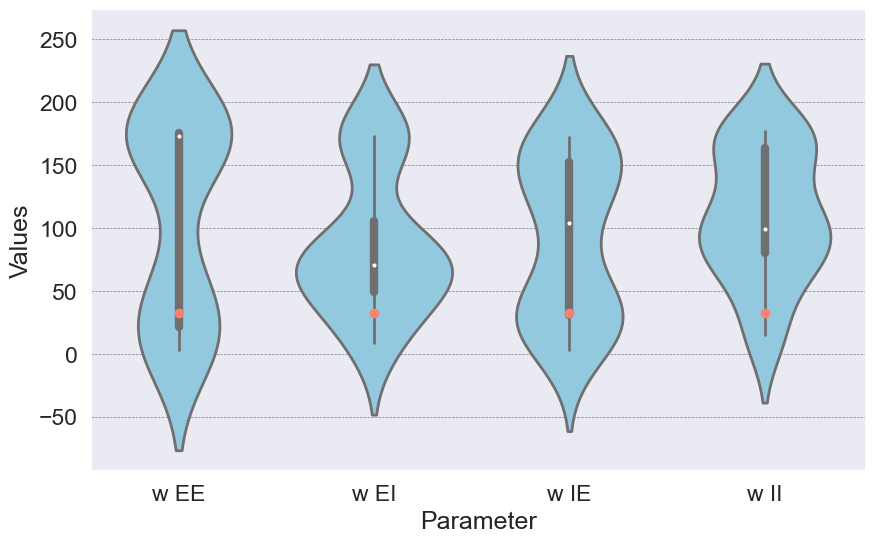

In [15]:
width = 0.8
linewidth=2

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["J EE", "J EI", "J IE", "J II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [11.31, 4.52, 16.97, 5.66]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["P EE", "P EI", "P IE", "P II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.11, 0.45, 0.11, 0.45]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["w EE", "w EI", "w IE", "w II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [32, 32, 32, 32]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()

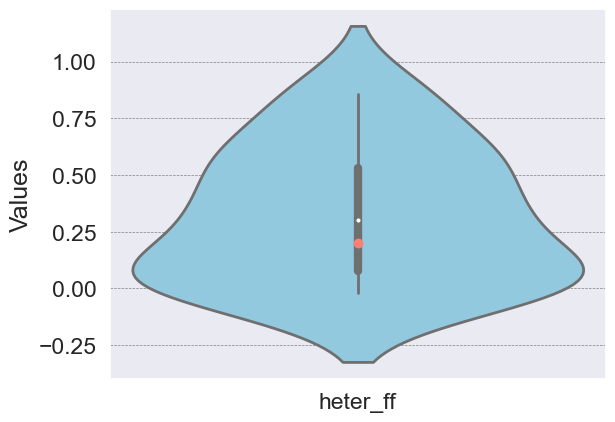

In [16]:
ax = sns.violinplot(data=df[["heter_ff"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
ground_truths = [0.2]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

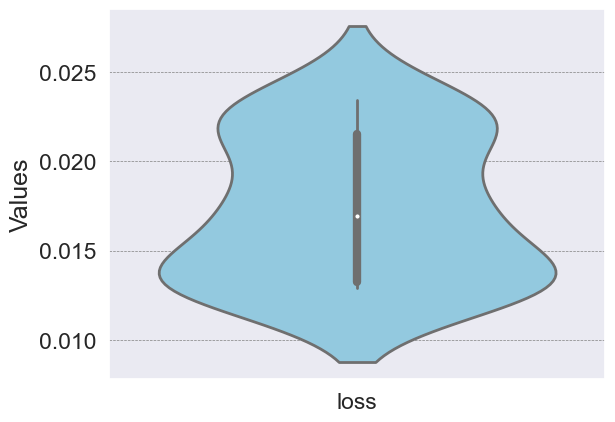

In [17]:
ax = sns.violinplot(data=df[["loss"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()